In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 804M/814M [00:19<00:00, 98.6MB/s]
100% 814M/814M [00:19<00:00, 43.2MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/dogs-vs-cats-redux-kernels-edition.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
filename="/content/train.zip"
with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
filen="/content/test.zip"
with ZipFile(filen, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.10599.jpg', 'dog.2883.jpg', 'cat.6924.jpg', 'dog.12110.jpg', 'cat.6009.jpg', 'dog.7020.jpg', 'dog.1149.jpg', 'cat.11909.jpg', 'dog.1947.jpg', 'cat.9914.jpg', 'dog.11314.jpg', 'cat.7866.jpg', 'dog.10806.jpg', 'dog.7897.jpg', 'dog.10197.jpg', 'cat.4286.jpg', 'dog.6617.jpg', 'dog.11000.jpg', 'cat.5753.jpg', 'cat.4335.jpg', 'cat.7001.jpg', 'dog.8380.jpg', 'cat.11514.jpg', 'dog.9821.jpg', 'dog.9993.jpg', 'dog.11155.jpg', 'cat.11855.jpg', 'dog.1034.jpg', 'dog.5999.jpg', 'cat.5371.jpg', 'cat.4413.jpg', 'cat.11634.jpg', 'cat.9323.jpg', 'dog.4668.jpg', 'cat.2195.jpg', 'dog.9235.jpg', 'dog.1784.jpg', 'dog.4568.jpg', 'dog.4050.jpg', 'cat.4144.jpg', 'cat.7110.jpg', 'cat.8798.jpg', 'dog.10014.jpg', 'dog.8294.jpg', 'dog.403.jpg', 'cat.5323.jpg', 'dog.2319.jpg', 'dog.4381.jpg', 'dog.1596.jpg', 'cat.5245.jpg', 'cat.12453.jpg', 'dog.11944.jpg', 'dog.5355.jpg', 'cat.150.jpg', 'cat.9989.jpg', 'cat.7149.jpg', 'cat.11222.jpg', 'dog.1040.jpg', 'dog.875.jpg', 'cat.3452.jpg', 'cat.12400.jpg', 'dog.5828.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab.patches import cv2_imshow

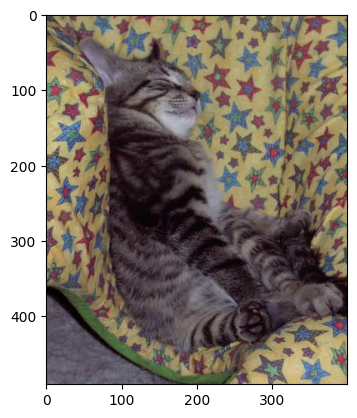

In [ ]:
img=mpimg.imread("/content/train/cat.10026.jpg")
plt.imshow(img)

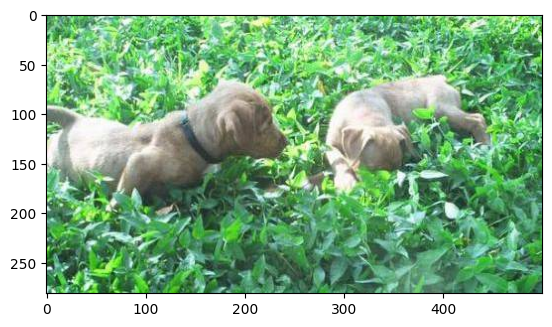

In [ ]:
img= mpimg.imread("/content/train/dog.10026.jpg")
plt.imshow(img)

In [ ]:

os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2500):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
filenames = os.listdir('/content/image resized/')
labels=[]
for i in range(2500):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(len(filenames))
print(len(labels))
print(filenames[0])
print(labels[0:7])

2500
2500
dog.10599.jpg
[1, 1, 0, 1, 0, 1, 1]


In [ ]:
val,cnt=np.unique(labels,return_counts=True)
print(val)
print(cnt)

[0 1]
[1238 1262]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images.shape)

(2500, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2500, 224, 224, 3) (2000, 224, 224, 3) (500, 224, 224, 3)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf


In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

NameError: name 'tf' is not defined

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
63/63 [==============================] - 91s 1s/step - loss: 0.1348 - accuracy: 0.9550
Epoch 2/5
63/63 [==============================] - 89s 1s/step - loss: 0.0596 - accuracy: 0.9815
Epoch 3/5
63/63 [==============================] - 91s 1s/step - loss: 0.0454 - accuracy: 0.9875
Epoch 4/5
63/63 [==============================] - 87s 1s/step - loss: 0.0357 - accuracy: 0.9925
Epoch 5/5
63/63 [==============================] - 94s 1s/step - loss: 0.0361 - accuracy: 0.9920


the content image that to be predict /content/dogs.jpg


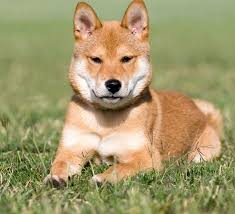

1/1 [==============================] - 1s 559ms/step
[[-1.7100743  0.9295067]]
1
The image represents a Dog


In [ ]:
input_image_path = input("the content image that to be predict ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')